<a href="https://colab.research.google.com/github/ArseniyKoz/uni.ml/blob/t2p/practice_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame = True)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size = 0.5, random_state = 241)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_score = lg.predict_proba(X_test)[:, 1]

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
roc = roc_auc_score(y_test, y_score)
pr = average_precision_score(y_test, y_score)
print("ROC-AUC: ", roc)
print("PR-AUC: ", pr)

ROC-AUC:  0.9982736974262397
PR-AUC:  0.998939320935714


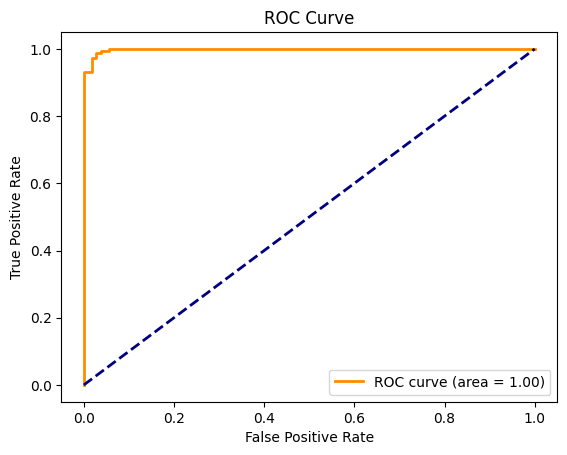

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

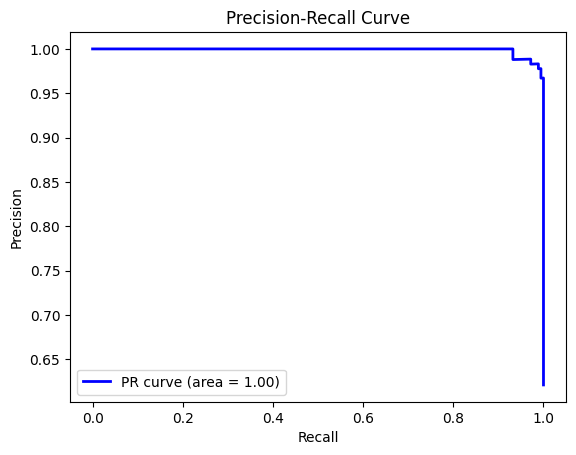

In [ ]:
from sklearn.metrics import precision_recall_curve
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_proba = y_score
threshold = 0.5
while True:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    recall = tp / (tp + fn)
    if recall >= 0.9:
        break
    threshold -= 0.01

# Матрица ошибок для найденного порога
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Анализ влияния параметра C в логистической регрессии на качество классификации
c_values = [1e-30, 1e-10, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 10., 15., 1e30, 1e100, 1e1000]
for c in c_values:
    lg = LogisticRegression(C=c).fit(X_train, y_train)
    y_pred_proba = lg.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC for C={c}: {roc_auc}")